# AMAZON ALEXA REVIEWS SENTIMENT ANALYSIS

- Amazon Alexa is a cloud-based voice service developed by Amazon that allows customers to interact with technology. There are currently over 40 million Alexa users around the world.

- Sentiment analysis is a technique that uses natural language processing (NLP) and machine learning to determine whether a text is positive, negative, or neutral. It's also known as "opinion mining" or "emotion artificial intelligence".

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/amazon_alexa.tsv", delimiter='\t')

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
data.shape

(3150, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [11]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [12]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [16]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [17]:
data["rating"].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [19]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

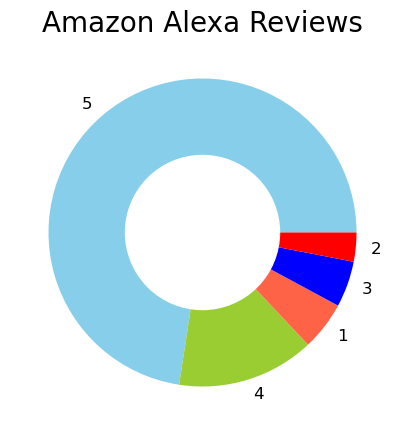

In [23]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5,5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
center_circle = plt.Circle((0,0),0.5,color="white")
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()

- we can see that most of the customers have rated Amazon Alexa including all its variants as 5. So it means that most of the customers are happy with Amazon Alexa.

# Amazon Alexa Reviews Sentiment Analysis

The verified_reviews column of the dataset contains all the reviews given by Amazon Alexa’s customers. So let’s add new columns to this data as positive, negative and neutral by calculating the sentiment scores of the reviews:

In [25]:
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]

In [26]:
data.head()

,rating,date,variation,verified_reviews,feedback,positive,negative,neutral
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.692,0.000,0.308
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.114,0.102,0.784
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.383,0.000,0.617
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000


In [27]:
x = sum(data["positive"])
y = sum(data["negative"])
z = sum(data["neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("positive 😊")
    elif (b>a) and (b>c):
        print("Negative 😠")
    else:
        print("neutral 🙂")
        
sentiment_score(x,y,z)

neutral 🙂


<Axes: xlabel='variable', ylabel='value'>

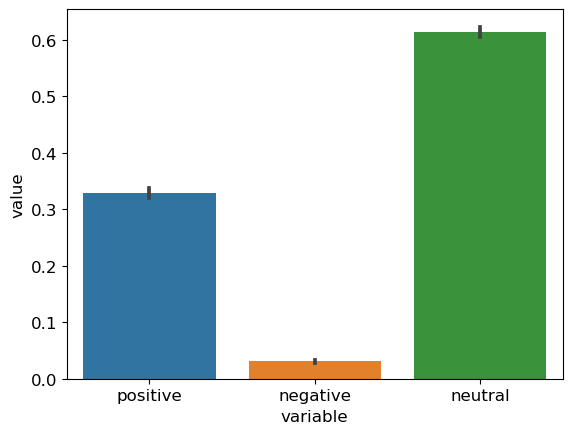

In [38]:
colu = ["positive","negative","neutral"]
df = data.melt(value_vars=data[colu])
sns.barplot(x=df["variable"], y = df["value"])

- The final output that we get is therefore neutral. This means that most users feel neutral about Amazon Alexa services